In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
income=np.array([10,12,15,19,23,32,44])
age=np.array([24,26,27,29,35,36,38])


In [3]:
df1=pd.DataFrame(income)
df2= pd.DataFrame(age)

In [4]:
df=pd.concat([df1,df2],axis= 1)

In [5]:
df.columns=['Income','Age']

In [6]:
df

,Income,Age
0,10,24
1,12,26
2,15,27
3,19,29
4,23,35
5,32,36
6,44,38


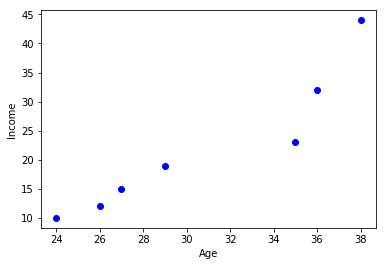

In [7]:
plt.plot(age,income,'bo')
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

In [8]:
inmean= income.mean()
inmean

22.142857142857142

In [9]:
TSS=sum((income-inmean)**2)
TSS

886.8571428571429

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linreg=LinearRegression() #initialte 

In [12]:
x= df2 #Always remember to put indepoendent x in dataframe and dependent y as series
y=pd.Series(income)

In [13]:
linreg.fit(x,y) #this will fit the variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
linreg.coef_ #this is beta1 for coefficients, slope

array([2.05140187])

In [15]:
linreg.intercept_ #this is beta0 or intercept

-40.864485981308434

In [16]:
#the final equation of the line is
# Income= -40.86 + 2.05*Age

In [17]:
#to get the prediction on the values of age
#use the above equation or alternatively
Ypred=linreg.predict(pd.DataFrame(df['Age']))
Ypred

array([ 8.36915888, 12.47196262, 14.52336449, 18.62616822, 30.93457944,
       32.98598131, 37.08878505])

In [18]:
df['Prediction']=Ypred

In [19]:
df

,Income,Age,Prediction
0,10,24,8.369159
1,12,26,12.471963
2,15,27,14.523364
3,19,29,18.626168
4,23,35,30.934579
5,32,36,32.985981
6,44,38,37.088785


In [20]:
linreg.predict(35)

array([30.93457944])

In [21]:
df['SqDiff']=(df['Prediction']-df['Income'])**2

In [22]:
df

,Income,Age,Prediction,SqDiff
0,10,24,8.369159,2.659643
1,12,26,12.471963,0.222749
2,15,27,14.523364,0.227181
3,19,29,18.626168,0.139750
4,23,35,30.934579,62.957551
5,32,36,32.985981,0.972159
6,44,38,37.088785,47.764892


In [23]:
SSE=sum(df.SqDiff)
SSE

114.94392523364485

In [24]:
Rsquare= 1- (SSE/TSS)
Rsquare

0.8703918368821659

In [25]:
df['AbsError']= (abs(df.Income-df.Prediction))

In [26]:
df['APE']=df.AbsError/df.Income

In [27]:
df

,Income,Age,Prediction,SqDiff,AbsError,APE
0,10,24,8.369159,2.659643,1.630841,0.163084
1,12,26,12.471963,0.222749,0.471963,0.039330
2,15,27,14.523364,0.227181,0.476636,0.031776
3,19,29,18.626168,0.139750,0.373832,0.019675
4,23,35,30.934579,62.957551,7.934579,0.344982
5,32,36,32.985981,0.972159,0.985981,0.030812
6,44,38,37.088785,47.764892,6.911215,0.157073


In [28]:
mape=sum(df.APE)/7
mape

0.11239029793231935

In [29]:
rmse= np.sqrt(SSE/7)
rmse

4.0522291084862845

In [30]:
print('SSE =',SSE,'\nTSE =', TSS, '\nR Square =', Rsquare,'\nRMSE =', rmse, '\nMAPE = ',mape)

SSE = 114.94392523364485 
TSE = 886.8571428571429 
R Square = 0.8703918368821659 
RMSE = 4.0522291084862845 
MAPE =  0.11239029793231935


In [31]:
data=pd.read_csv("USA_Housing.csv")

In [32]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [33]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [35]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

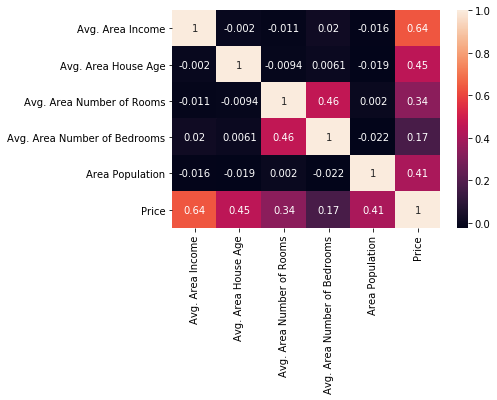

In [45]:
import seaborn as sns

sns.heatmap(data.corr(),annot=True)
plt.show()

In [71]:
housereg= LinearRegression()

# Iteration 1

In [93]:
houseregol = LinearRegression()

houseregol.fit(pd.DataFrame(data[['Avg. Area Income', 'Area Population']]),data['Price'])

data['Predictionol']=houseregol.predict(pd.DataFrame(data[['Avg. Area Income','Area Population']]))

SSEol=sum((data.Predictionol-data.Price)**2)
TSSol=sum((data.Price-np.mean(data.Price))**2)

R2ol=1-(SSEol/TSSol)

mapeol= (sum(abs((data.Predictionol-data.Price)/data.Price)))/len(data)

print('Rsquare is : ',R2ol,'\nMAPE is : ',mapeol)

Rsquare is :  0.5848172606596742 
MAPE is :  0.18407325623907503


# Iteration 2

In [78]:
housereg.fit(pd.DataFrame(data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]),data['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
housereg.intercept_

-2637299.0333281267

In [80]:
housereg.coef_

array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])

In [82]:
data['Prediction']=housereg.predict(pd.DataFrame(data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]))

In [83]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Prediction
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1.223847e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",1.494938e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",1.253017e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,1.121224e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,8.453888e+05


In [85]:
SSE2=sum((data.Prediction-data.Price)**2)
TSS2=sum((data.Price-np.mean(data.Price))**2)

In [87]:
R2=1-(SSE2/TSS2)
R2

0.9180238195089552

In [90]:
mape= (sum(abs((data.Prediction-data.Price)/data.Price)))/len(data)
mape

0.07624185208181675

In [94]:
print('Rsquare is : ',R2,'\nMAPE is : ',mape)

Rsquare is :  0.9180238195089552 
MAPE is :  0.07624185208181675


# Regression with categorical independent variable